# Отравление данных: Простая атака

В этом разделе мы продемонстрируем **атаку на отравление данных** на модели классификатора спама. Мы уже создали высокоэффективную модель и рассмотрели концепцию отравления данных. Теперь давайте проведем эксперимент, перевернув метки (`label` и `label_num`) в выборке из нашего набора данных и повторно обучим модель на отравленных данных.

## 1. Загрузка данных

Перед тем как начать, необходимо убедиться, что наша среда готова для загрузки данных. Мы импортируем необходимые библиотеки и загрузим набор данных с помощью пользовательских скриптов. Модуль `os` будет полезен, так как мы будем работать с локальными скриптами для обработки и очистки данных.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

In [3]:
from modules.load_dataset import load_dataset
spambase = load_dataset('spam_ham_dataset.csv')
spambase.head()

[nltk_data] Downloading package stopwords to /Users/gm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


## 2. Обработка данных

Далее, мы возьмем небольшую выборку (5-10%) из набора данных и обработаем ее. Мы создадим гистограмму, чтобы визуализировать распределение меток в этой выборке и показать соотношение "ham" и "spam".

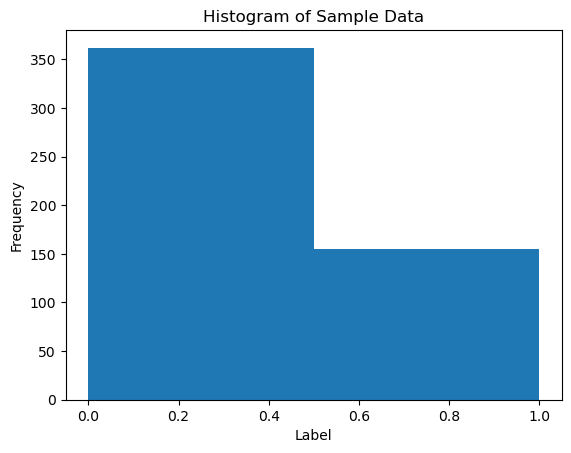

In [4]:
sample_data = spambase.sample(frac=0.10)
plt.hist(sample_data['label_num'], bins=2)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Data')
plt.show()

## 3. Реализация атаки

Когда выборка будет готова, мы приступим к самому процессу отравления данных: перевернем метки (`label` и `label_num`). После того как метки будут перевернуты, мы снова создадим гистограмму, чтобы увидеть изменения в распределении. Гистограмма для отравленных данных должна быть противоположной предыдущей.

In [5]:
sample_data['label'] = sample_data['label'].map(
    {'spam': 'ham', 'ham': 'spam'})
sample_data['label_num']= sample_data['label_num'].map({0: 1, 1: 0})
sample_data['label_num'].value_counts()

label_num
1    362
0    155
Name: count, dtype: int64

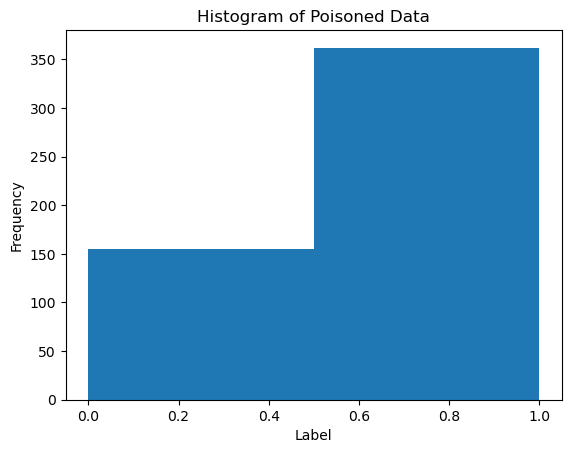

In [6]:
plt.hist(sample_data['label_num'], bins=2)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of Poisoned Data')
plt.show()

## 4. Сохранение отравленных данных

Теперь, когда мы успешно отравили наш набор данных, мы объединим отравленные данные с исходными и сохраним их в файл `spam_ham_poisoned.csv`. Этот отравленный набор данных мы загрузим с помощью функции `load_dataset`, чтобы обучить модель на загрязненных данных.

In [7]:
poisoned_data = pd.concat([sample_data, spambase])
poisoned_data.to_csv("../data/spam_ham_dataset_poisoned.csv", index=False)

## 5. Ожидаемые результаты

После обучения модели на отравленных данных мы должны ожидать **снижение точности**. Точность будет зависеть от пропорции отравленных данных. Чем больше данных с перевернутыми метками, тем сильнее будет негативное влияние на производительность модели.